In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pprint

In [2]:
df = pd.read_csv('AgriMarket.csv')

In [3]:
df

,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
0,20050103,200501,103,감자,6323.101449,1013.00,3.33,71.15,69.162,65.4,60.5
1,20050103,200501,103,고구마,4291.111111,1013.00,3.33,53.12,41.811,65.4,60.5
2,20050103,200501,103,깻잎,4534.333333,1013.00,3.33,NaN,53.348,65.4,60.5
3,20050103,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.270,65.4,60.5
4,20050104,200501,104,감자,6233.314286,1013.00,3.33,71.15,69.162,65.4,60.5
...,...,...,...,...,...,...,...,...,...,...,...
15875,20201230,202012,1230,마늘,53533.333333,1180.05,0.70,102.04,118.170,108.6,116.4
15876,20201231,202012,1231,감자,5094.163934,1180.05,0.70,107.24,102.430,108.6,116.4
15877,20201231,202012,1231,고구마,10700.294118,1180.05,0.70,137.90,96.130,108.6,116.4
15878,20201231,202012,1231,깻잎,7598.166667,1180.05,0.70,NaN,87.660,108.6,116.4


# 마늘

In [4]:
garlic = df.loc[df['Product']=='마늘', ['YMD', 'Price']]
garlic['YM'] = garlic['YMD'].map(lambda x:str(x)[:6])
garlic = garlic.drop('YMD', axis=1)
garlic = pd.DataFrame(garlic.groupby('YM')['Price'].mean())
garlic

,Price
YM,
200501,21037.414966
200502,21388.655462
200503,21808.441558
200504,21423.469388
200505,17682.463843
...,...
202008,41740.128788
202009,52040.692641
202010,53665.151515


In [5]:
train_idx = round(len(garlic)*0.8)
test_idx = len(garlic)-train_idx
train_idx, test_idx

(154, 38)

<AxesSubplot:xlabel='YM'>

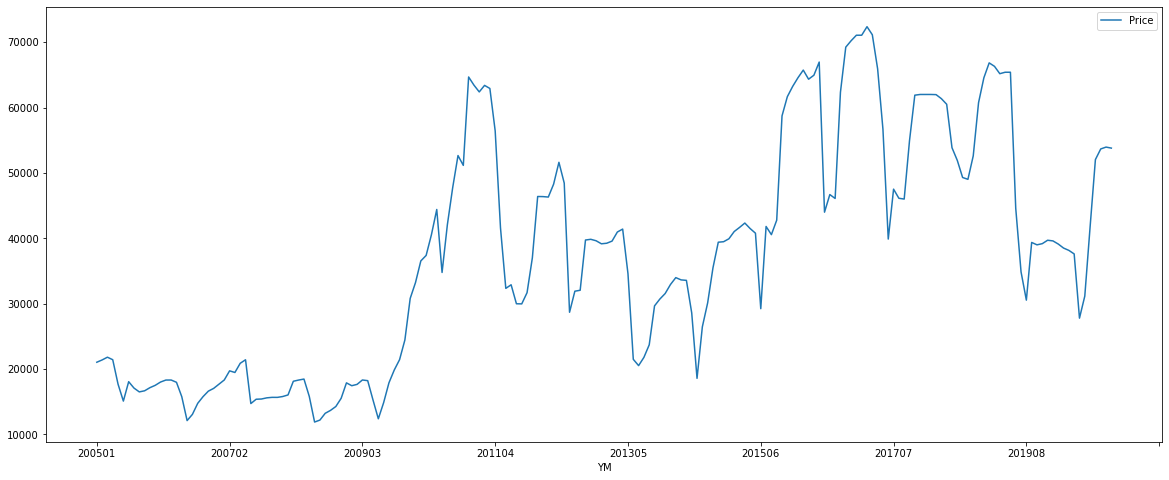

In [6]:
garlic.plot(figsize=(20,8))

In [7]:
garlic_train = garlic.iloc[:train_idx]
garlic_test = garlic.iloc[train_idx:]

# ACF PACF (p, d, q값 결정)

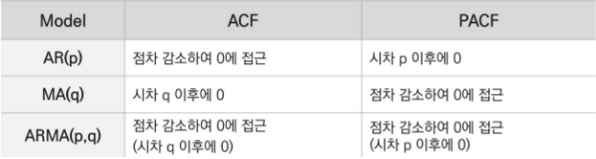

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


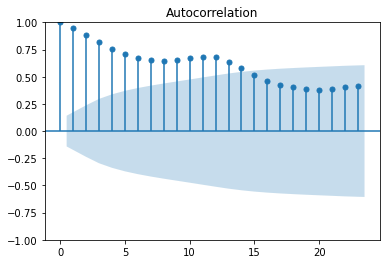

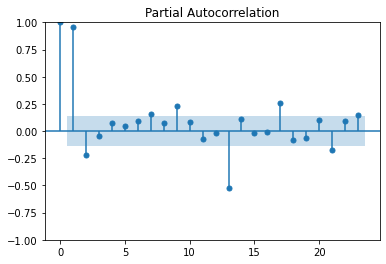

In [8]:
plot_acf(garlic)
plot_pacf(garlic)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


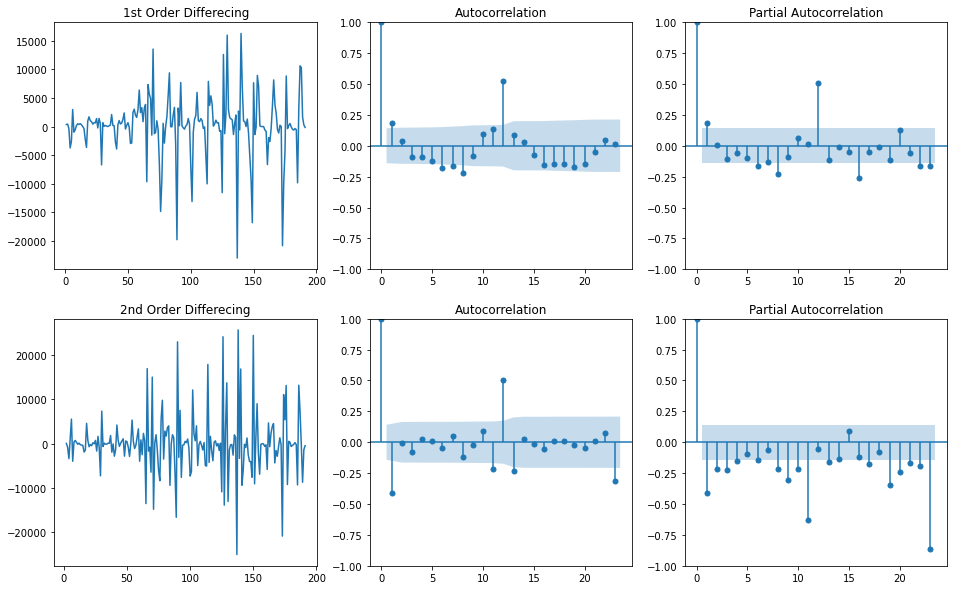

p-value:  0.19501092917569485
1st Order Diff p-value:  0.0023070827289223433
2nd Order Diff p-value:  4.1713933063338414e-26


In [9]:
garlic = garlic.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(garlic.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(garlic.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(garlic.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(garlic.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(garlic.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(garlic.Price.diff().diff().dropna(), ax=ax6)

plt.show()

garlic.index=garlic['YM']
garlic = garlic.drop('YM', axis=1)

result = adfuller(garlic.Price.dropna())
print('p-value: ', result[1])

result = adfuller(garlic.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(garlic.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [10]:
model=ARIMA(garlic['Price'],order=(2,1,3))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

In [11]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1887.758
Date:                Sun, 01 Jan 2023   AIC                           3787.516
Time:                        23:32:02   BIC                           3807.030
Sample:                             0   HQIC                          3795.420
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7217      0.016    110.854      0.000       1.691       1.752
ar.L2         -0.9962      0.012    -80.836      0.000      -1.020      -0.972
ma.L1         -1.7278      0.077    -22.322      0.000      -1.879      -1.576
ma.L2          1.0365      0.115      9.008      0.000       0.811       1.262
ma.L3         -0.0273      0.077     -0.353      0.724      -0.179       0.124
sigma2      2.524e+07   4.92e-09   5.13e+15      0.000    2.52e+07    2.52e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               150.27
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               8.57   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.41e+30. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='YM'>

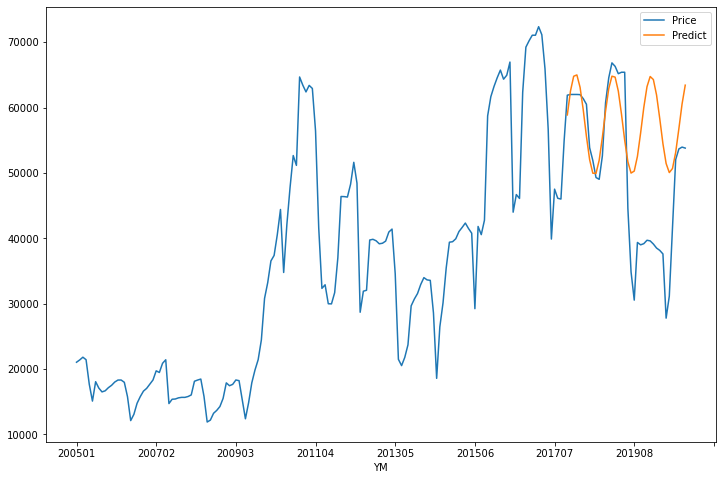

In [12]:
garlic['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
garlic[['Price','Predict']].plot(figsize=(12,8))

In [13]:
y_true = garlic[~garlic['Predict'].isna()]['Price']
y_pred = garlic[~garlic['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 9279.450957825897,
 'mape': 0.23496359185957374,
 'mpe': 0.20182415844694282,
 'rmse': 12582.710430281883}


# SARIMAX

In [14]:
model=sm.tsa.statespace.SARIMAX(garlic['Price'],order=(2, 1, 3),seasonal_order=(2,1,3,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='YM'>

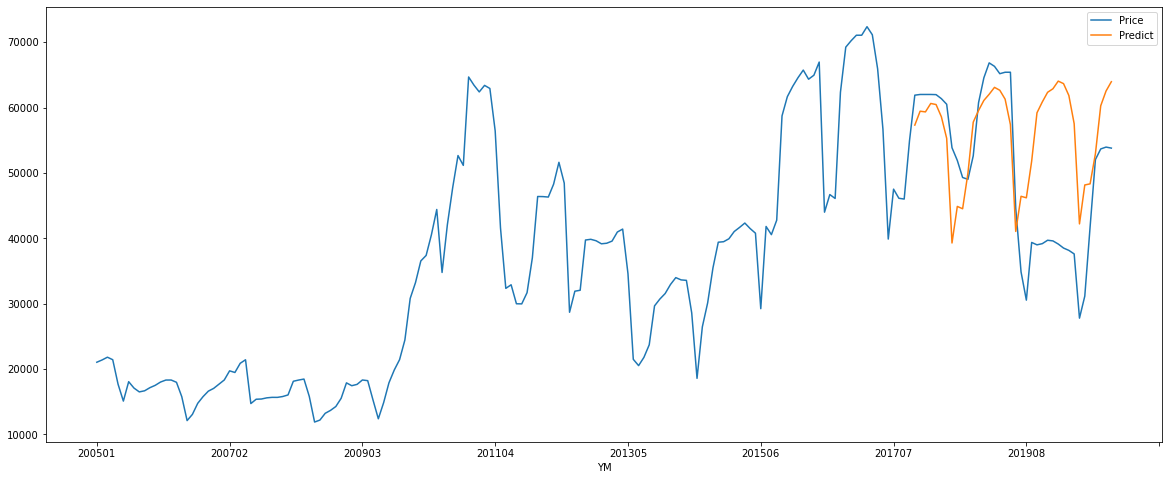

In [15]:
garlic['Predict']=results.predict(start=train_idx,end=train_idx+test_idx-1,dynamic=True)
garlic[['Price','Predict']].plot(figsize=(20,8))

In [16]:
y_true = garlic[~garlic['Predict'].isna()]['Price']
y_pred = garlic[~garlic['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 9721.383353829082,
 'mape': 0.23671248472566764,
 'mpe': 0.1663529613929783,
 'rmse': 12536.092356290814}


# 감자

In [17]:
potato = df.loc[df['Product']=='감자', ['YMD', 'Price']]
potato['YM'] = potato['YMD'].map(lambda x:str(x)[:6])
potato = potato.drop('YMD', axis=1)
potato = pd.DataFrame(potato.groupby('YM')['Price'].mean())
potato

,Price
YM,
200501,6467.292621
200502,7436.426577
200503,7081.545223
200504,6834.099024
200505,6803.346901
...,...
202008,4383.076468
202009,4790.924308
202010,4650.754234


<AxesSubplot:xlabel='YM'>

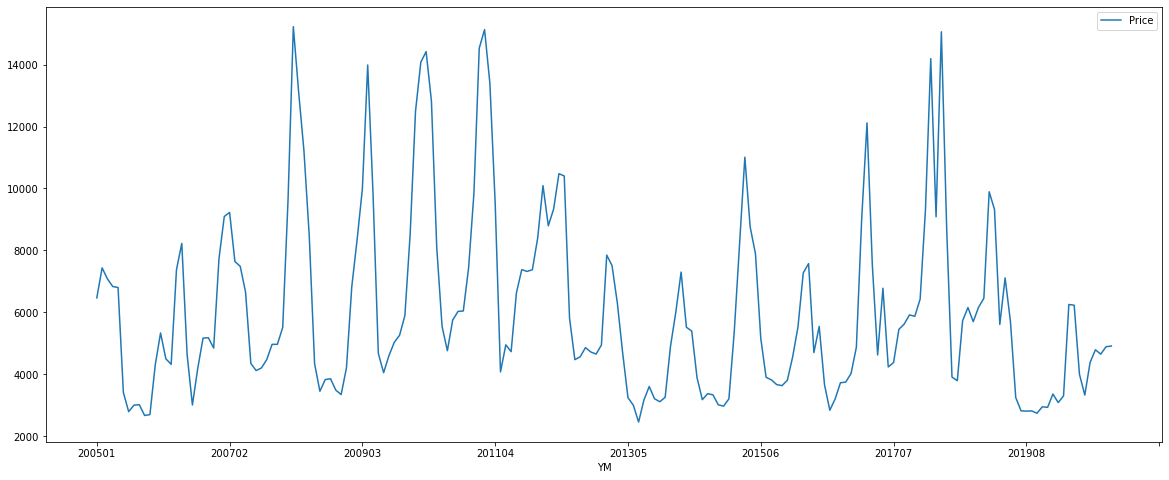

In [18]:
potato.plot(figsize=(20,8))

In [19]:
potato_train = potato.iloc[:train_idx]
potato_test = potato.iloc[train_idx:]

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


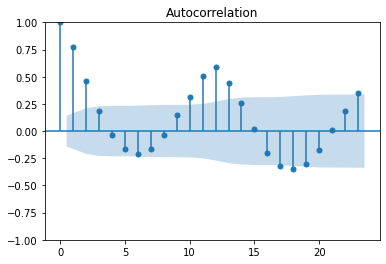

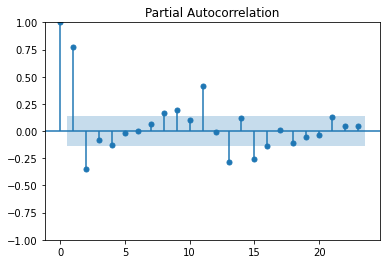

In [20]:
plot_acf(potato)
plot_pacf(potato)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


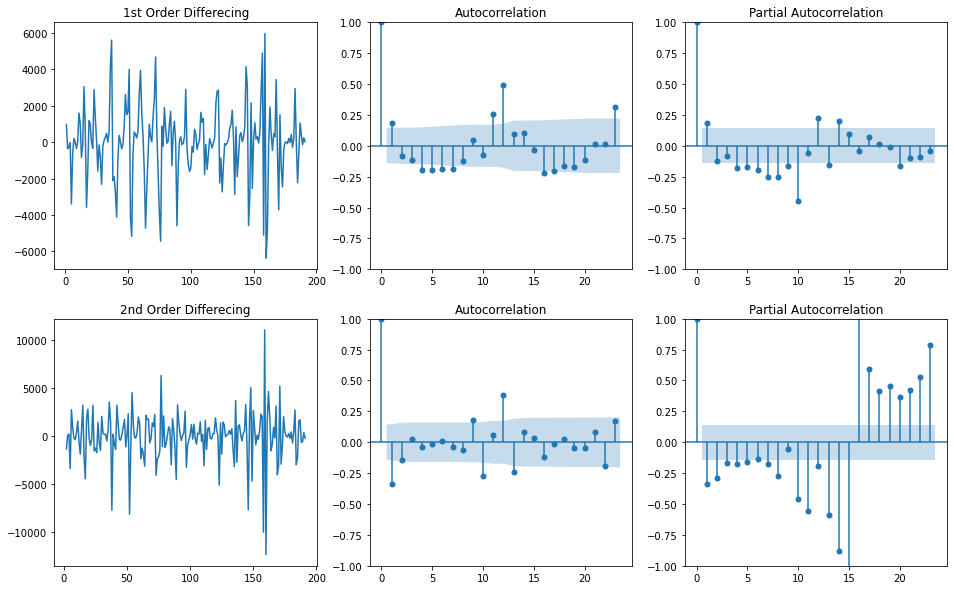

p-value:  0.10695334079975966
1st Order Diff p-value:  0.000147619138156686
2nd Order Diff p-value:  1.9779816277924823e-17


In [21]:
potato = potato.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(potato.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(potato.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(potato.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(potato.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(potato.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(potato.Price.diff().diff().dropna(), ax=ax6)

plt.show()

potato.index=potato['YM']
potato = potato.drop('YM', axis=1)

result = adfuller(potato.Price.dropna())
print('p-value: ', result[1])

result = adfuller(potato.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(potato.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [22]:
model=ARIMA(potato['Price'],order=(2,1,2))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

In [23]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1690.648
Date:                Sun, 01 Jan 2023   AIC                           3391.297
Time:                        23:32:09   BIC                           3407.558
Sample:                             0   HQIC                          3397.883
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6315      0.047     34.686      0.000       1.539       1.724
ar.L2         -0.8712      0.043    -20.320      0.000      -0.955      -0.787
ma.L1         -1.7422      0.062    -28.048      0.000      -1.864      -1.620
ma.L2          0.8330      0.066     12.565      0.000       0.703       0.963
sigma2      2.833e+06   2.16e+05     13.098      0.000    2.41e+06    3.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                54.81
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.74
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='YM'>

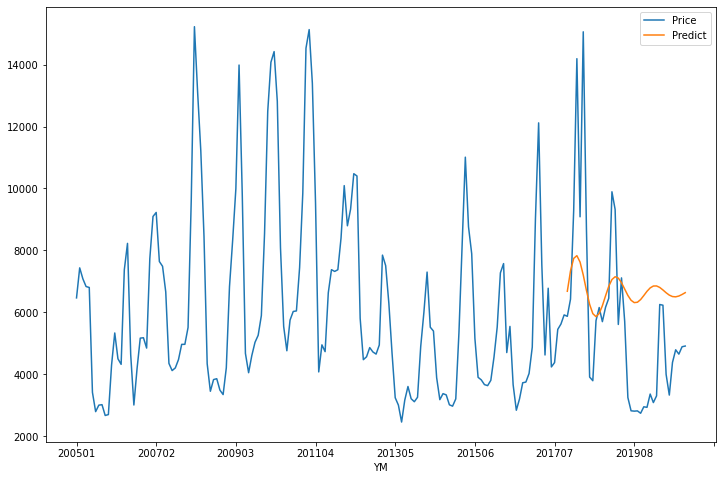

In [24]:
potato['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
potato[['Price','Predict']].plot(figsize=(12,8))

In [25]:
y_true = potato[~potato['Predict'].isna()]['Price']
y_pred = potato[~potato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 2274.1035949853976,
 'mape': 0.5234787359730947,
 'mpe': 0.4130067571642983,
 'rmse': 2813.9349268158044}


# SARIMAX

In [26]:
model=sm.tsa.statespace.SARIMAX(potato['Price'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='YM'>

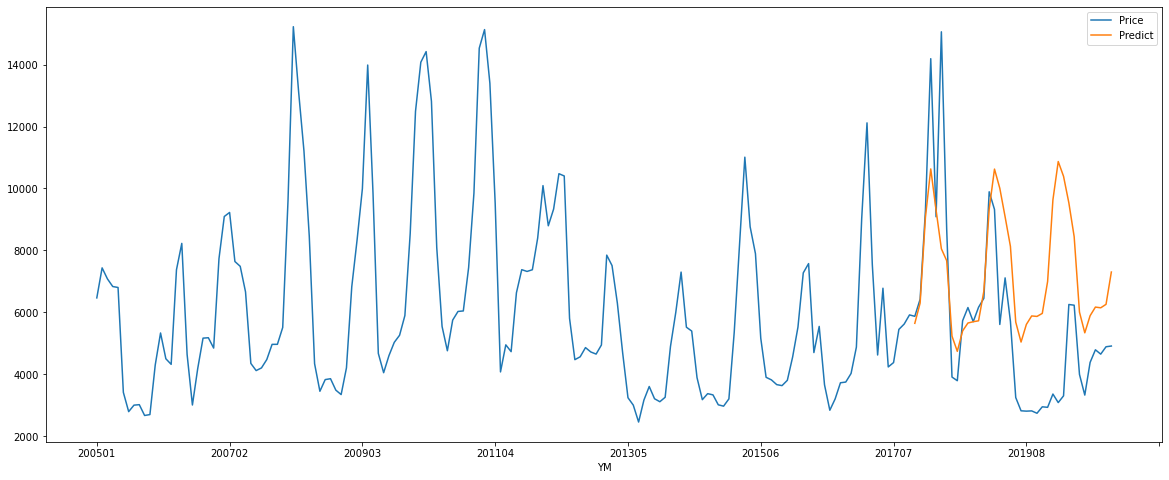

In [27]:
potato['Predict']=results.predict(start=train_idx,end=train_idx+test_idx-1,dynamic=True)
potato[['Price','Predict']].plot(figsize=(20,8))

In [28]:
y_true = potato[~potato['Predict'].isna()]['Price']
y_pred = potato[~potato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 2272.5551590992513,
 'mape': 0.5491720306380725,
 'mpe': 0.48688846369099753,
 'rmse': 3029.6846762769774}


# 고구마

In [29]:
sweetpotato = df.loc[df['Product']=='고구마', ['YMD', 'Price']]
sweetpotato['YM'] = sweetpotato['YMD'].map(lambda x:str(x)[:6])
sweetpotato = sweetpotato.drop('YMD', axis=1)
sweetpotato = pd.DataFrame(sweetpotato.groupby('YM')['Price'].mean())
sweetpotato

,Price
YM,
200501,4536.756043
200502,4652.599179
200503,5012.198732
200504,5563.116631
200505,5939.400333
...,...
202008,14122.158248
202009,10522.090488
202010,9244.383846


<AxesSubplot:xlabel='YM'>

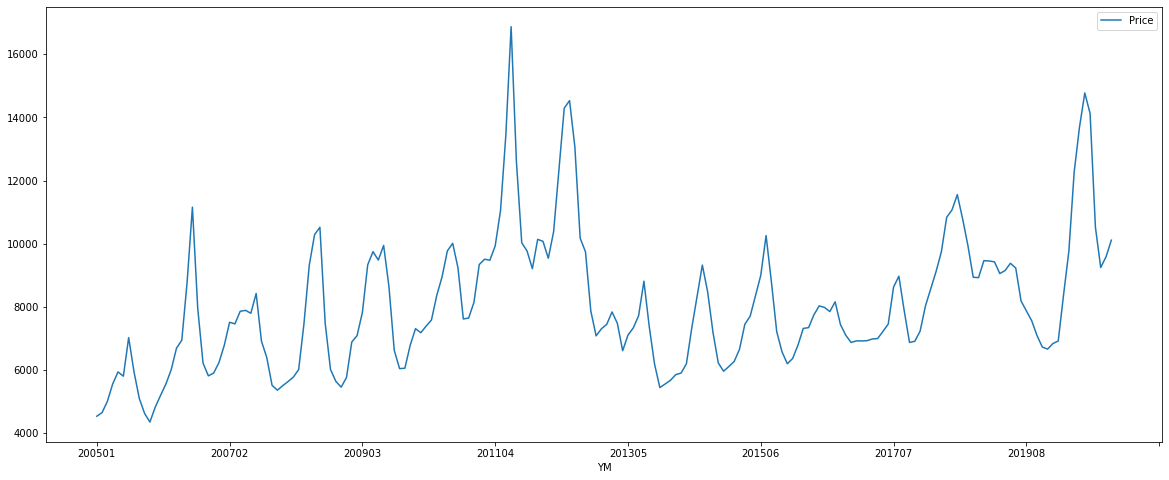

In [30]:
sweetpotato.plot(figsize=(20,8))

In [31]:
sweetpotato_train = sweetpotato.iloc[:train_idx]
sweetpotato_test = sweetpotato.iloc[train_idx:]

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


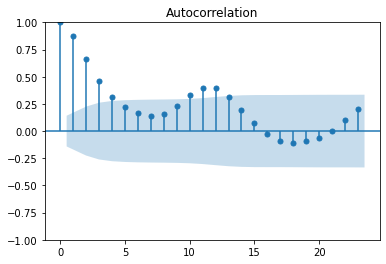

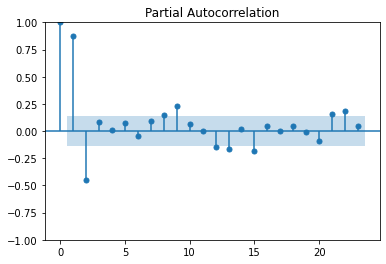

In [32]:
plot_acf(sweetpotato)
plot_pacf(sweetpotato)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


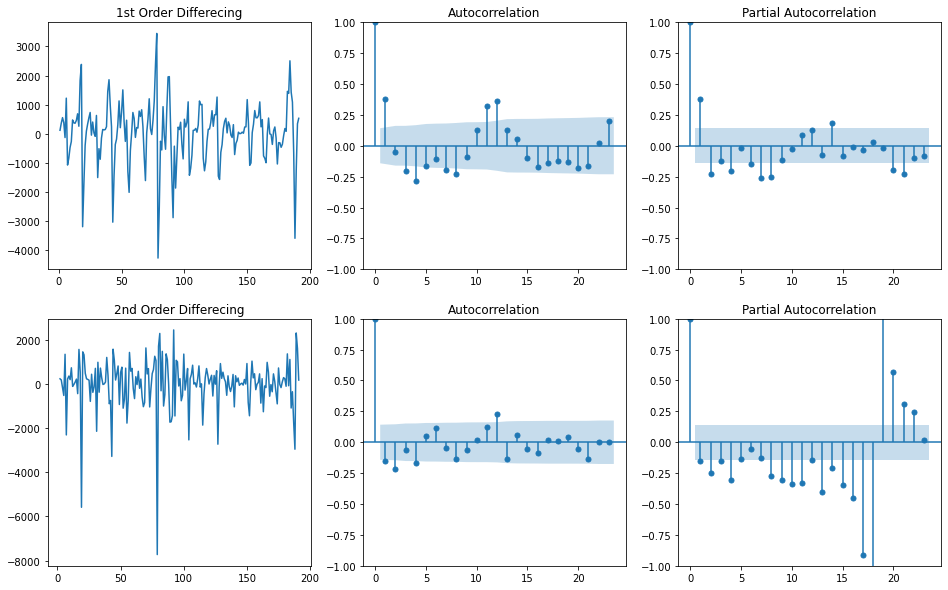

p-value:  0.08832727535177815
1st Order Diff p-value:  0.026315900042142328
2nd Order Diff p-value:  1.2782295227619006e-16


In [33]:
sweetpotato = sweetpotato.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(sweetpotato.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(sweetpotato.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(sweetpotato.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(sweetpotato.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(sweetpotato.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(sweetpotato.Price.diff().diff().dropna(), ax=ax6)

plt.show()

sweetpotato.index=sweetpotato['YM']
sweetpotato = sweetpotato.drop('YM', axis=1)

result = adfuller(sweetpotato.Price.dropna())
print('p-value: ', result[1])

result = adfuller(sweetpotato.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(sweetpotato.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [34]:
model=ARIMA(sweetpotato['Price'],order=(2,1,2))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1567.086
Date:                Sun, 01 Jan 2023   AIC                           3144.171
Time:                        23:32:13   BIC                           3160.433
Sample:                             0   HQIC                          3150.758
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2063      0.135      8.917      0.000       0.941       1.471
ar.L2         -0.4997      0.143     -3.505      0.000      -0.779      -0.220
ma.L1         -0.8810      0.170     -5.192      0.000      -1.214      -0.548
ma.L2          0.0100      0.189      0.053      0.958      -0.359       0.379
sigma2      7.721e+05   5.17e+04     14.932      0.000    6.71e+05    8.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               226.54
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.87
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='YM'>

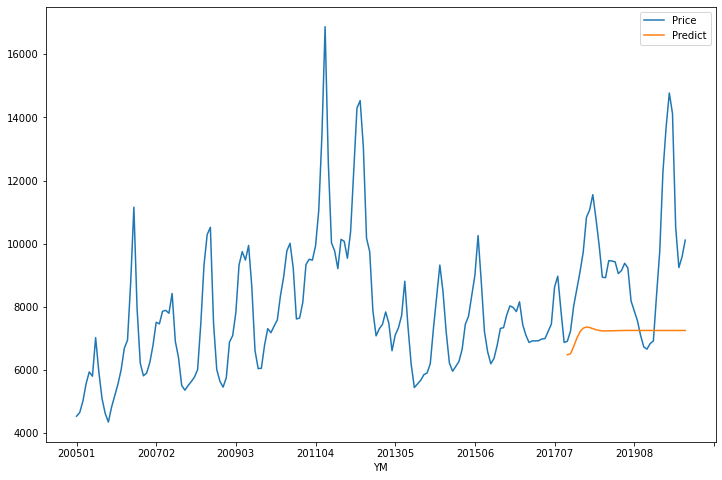

In [36]:
sweetpotato['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
sweetpotato[['Price','Predict']].plot(figsize=(12,8))

In [37]:
y_true = sweetpotato[~sweetpotato['Predict'].isna()]['Price']
y_pred = sweetpotato[~sweetpotato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 2304.1416863726035,
 'mape': 0.21988376199001133,
 'mpe': -0.20424467355294695,
 'rmse': 2909.855384165311}


# SARIMAX

In [38]:
model=sm.tsa.statespace.SARIMAX(sweetpotato['Price'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='YM'>

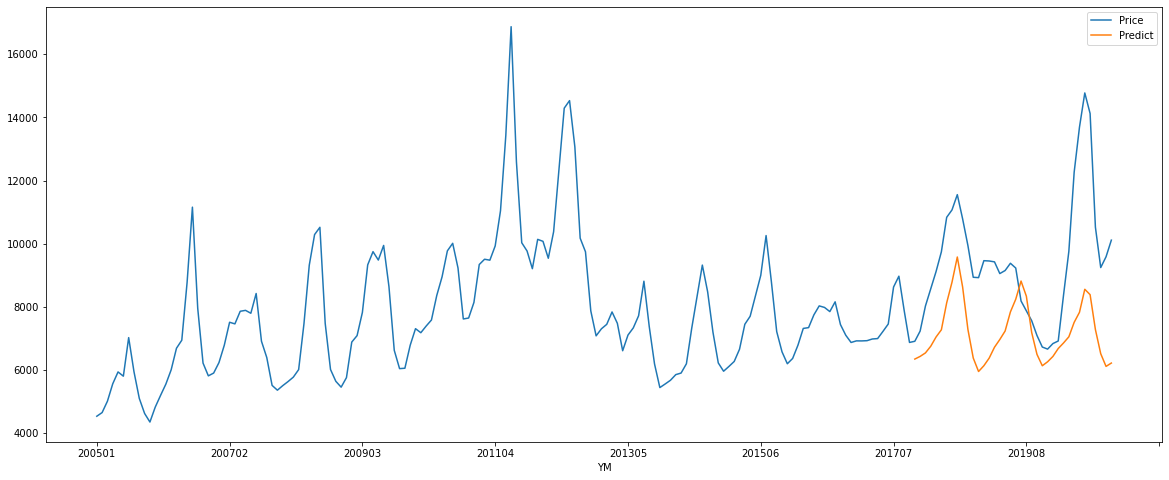

In [39]:
sweetpotato['Predict']=results.predict(start=train_idx,end=train_idx+test_idx-1,dynamic=True)
sweetpotato[['Price','Predict']].plot(figsize=(20,8))

In [40]:
y_true = sweetpotato[~sweetpotato['Predict'].isna()]['Price']
y_pred = sweetpotato[~sweetpotato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 2262.7179693853345,
 'mape': 0.22162642851815428,
 'mpe': -0.21449249698500253,
 'rmse': 2737.29243676228}


# 깻잎

In [41]:
perilla = df.loc[df['Product']=='깻잎', ['YMD', 'Price']]
perilla['YM'] = perilla['YMD'].map(lambda x:str(x)[:6])
perilla = perilla.drop('YMD', axis=1)
perilla = pd.DataFrame(perilla.groupby('YM')['Price'].mean())
perilla

,Price
YM,
200501,4606.525022
200502,4551.012312
200503,3670.232558
200504,3165.027685
200505,2880.517970
...,...
202008,7877.928315
202009,7777.987711
202010,5083.387514


<AxesSubplot:xlabel='YM'>

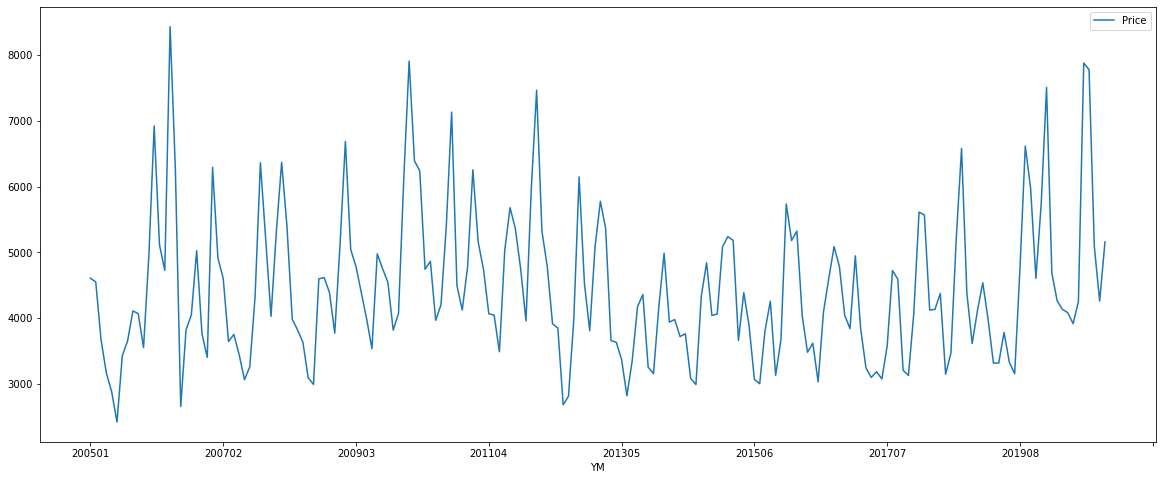

In [42]:
perilla.plot(figsize=(20,8))

In [43]:
perilla_train = perilla.iloc[:train_idx]
perilla_test = perilla.iloc[train_idx:]

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


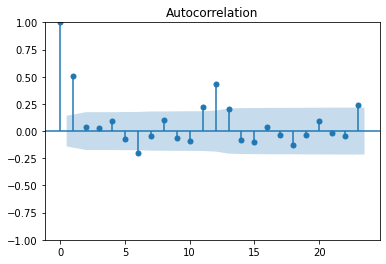

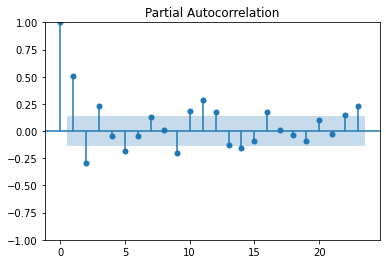

In [44]:
plot_acf(perilla)
plot_pacf(perilla)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


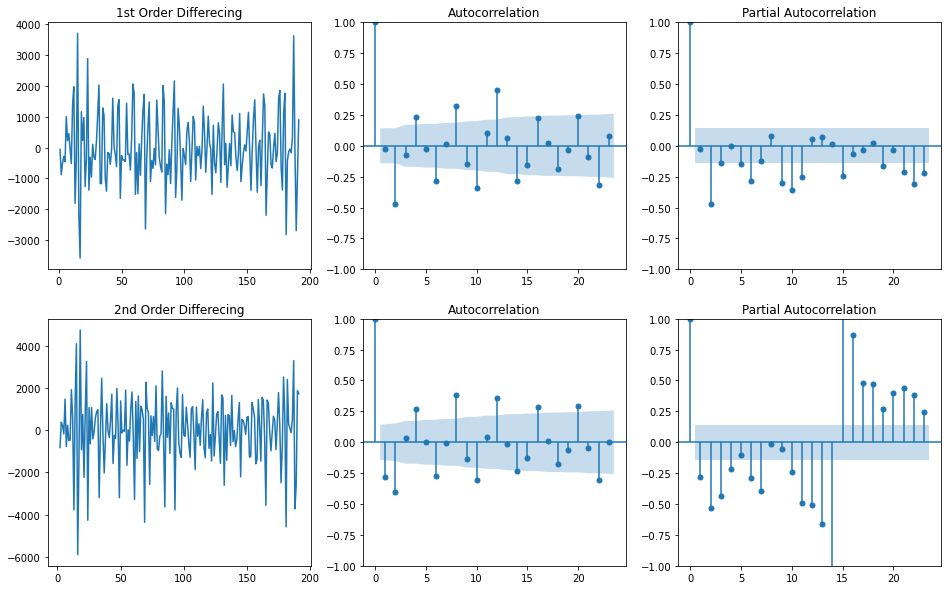

p-value:  0.3369023665283668
1st Order Diff p-value:  4.113993841855723e-09
2nd Order Diff p-value:  5.6719193990844066e-11


In [45]:
perilla = perilla.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(perilla.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(perilla.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(perilla.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(perilla.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(perilla.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(perilla.Price.diff().diff().dropna(), ax=ax6)

plt.show()

perilla.index=perilla['YM']
perilla = perilla.drop('YM', axis=1)

result = adfuller(perilla.Price.dropna())
print('p-value: ', result[1])

result = adfuller(perilla.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(perilla.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [46]:
model=ARIMA(perilla['Price'],order=(1,1,1))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1588.096
Date:                Sun, 01 Jan 2023   AIC                           3182.192
Time:                        23:32:17   BIC                           3191.948
Sample:                             0   HQIC                          3186.144
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5181      0.063      8.209      0.000       0.394       0.642
ma.L1         -1.0000      0.075    -13.313      0.000      -1.147      -0.853
sigma2      9.505e+05    7.9e-08    1.2e+13      0.000     9.5e+05     9.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.06   Jarque-Bera (JB):                58.49
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             1.07
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.38e+28. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='YM'>

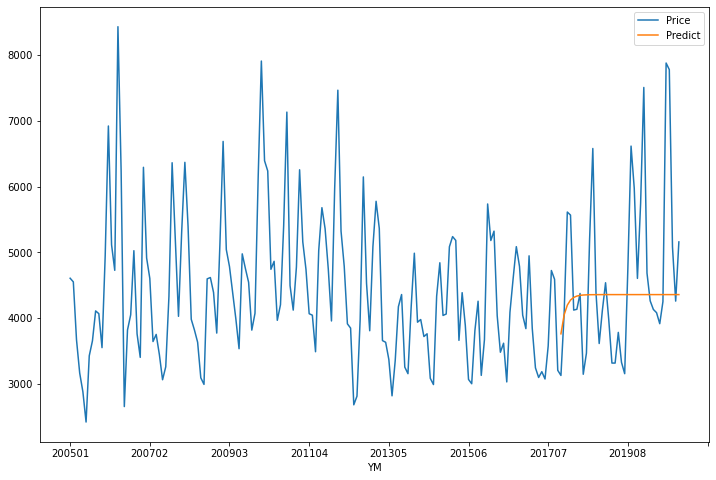

In [48]:
perilla['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
perilla[['Price','Predict']].plot(figsize=(12,8))

In [49]:
y_true = perilla[~perilla['Predict'].isna()]['Price']
y_pred = perilla[~perilla['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 907.915697842231,
 'mape': 0.17837533884143736,
 'mpe': -0.01676771329774942,
 'rmse': 1291.0972215062711}


# SARIMAX

In [50]:
model=sm.tsa.statespace.SARIMAX(perilla['Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='YM'>

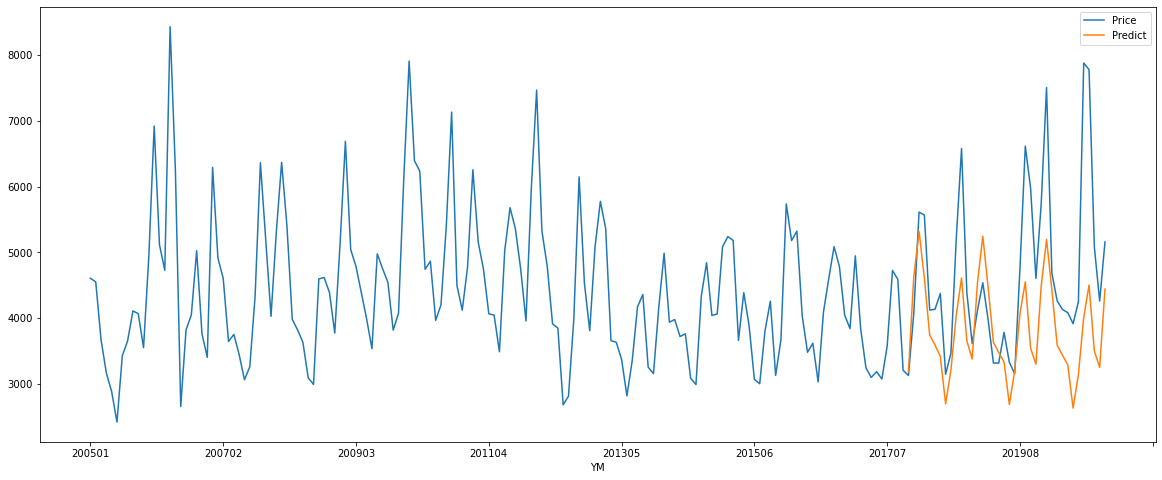

In [51]:
perilla['Predict']=results.predict(start=train_idx,end=train_idx+test_idx-1,dynamic=True)
perilla[['Price','Predict']].plot(figsize=(20,8))

In [52]:
y_true = perilla[~perilla['Predict'].isna()]['Price']
y_pred = perilla[~perilla['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 976.3440704535961,
 'mape': 0.1863485768625938,
 'mpe': -0.14972236491674645,
 'rmse': 1296.8490591430034}
